## A projectile with air resistance

https://scipython.com/book2/chapter-8-scipy/examples/a-projectile-with-air-resistance/

  message: 'A termination event occurred.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ffab84eed10>
   status: 1
  success: True
        t: array([0.00000000e+00, 2.82832899e-05, 3.11116189e-04, 3.13944518e-03,
       3.14227351e-02, 3.14255634e-01, 1.06058938e+00, 2.22188636e+00,
       4.15895918e+00, 6.33623381e+00])
 t_events: [array([6.33623381]), array([2.7939952])]
        y: array([[ 0.00000000e+00,  5.97646750e-04,  6.57356524e-03,
         6.62779269e-02,  6.57916020e-01,  6.10052110e+00,
         1.76432193e+01,  3.14572077e+01,  4.97860543e+01,
         6.41157720e+01],
       [ 2.11309131e+01,  2.11305601e+01,  2.11270311e+01,
         2.10918152e+01,  2.07469548e+01,  1.79056176e+01,
         1.35736705e+01,  1.06743281e+01,  8.24037743e+00,
         4.93588825e+00],
       [ 0.00000000e+00,  1.28165367e-03,  1.40965814e-02,
         1.42085158e-01,  1.40609179e+00,  1.26238480e+01,
         3.30428628e+01,  4.7

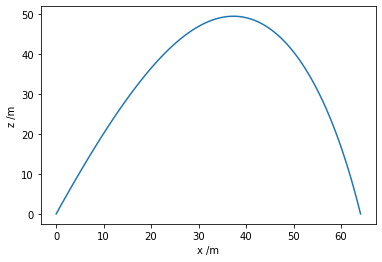

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Drag coefficient, projectile radius (m), area (m2) and mass (kg).
c = 0.47
r = 0.05
A = np.pi * r**2
m = 0.2
# Air density (kg.m-3), acceleration due to gravity (m.s-2).
rho_air = 1.28 # Make this zero make it drag free motion
g = 9.81
# For convenience, define  this constant.
k = 0.5 * c * rho_air * A

# Initial speed and launch angle (from the horizontal).
v0 = 50
phi0 = np.radians(65)

def deriv(t, u):
    x, xdot, z, zdot = u
    speed = np.hypot(xdot, zdot)
    xdotdot = -k/m * speed * xdot
    zdotdot = -k/m * speed * zdot - g
    return xdot, xdotdot, zdot, zdotdot

# Initial conditions: x0, v0_x, z0, v0_z.
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)
# Integrate up to tf unless we hit the target sooner.
t0, tf = 0, 50

def hit_target(t, u):
    # We've hit the target if the z-coordinate is 0.
    return u[2]
# Stop the integration when we hit the target.
hit_target.terminal = True
# We must be moving downwards (don't stop before we begin moving upwards!)
hit_target.direction = -1

def max_height(t, u):
    # The maximum height is obtained when the z-velocity is zero.
    return u[3]

soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                 events=(hit_target, max_height))
print(soln)
print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

# A fine grid of time points from 0 until impact time.
t = np.linspace(0, soln.t_events[0][0], 100)

# Retrieve the solution for the time grid and plot the trajectory.
sol = soln.sol(t)
x, z = sol[0], sol[2]
print('Range to target, xmax = {:.2f} m'.format(x[-1]))
print('Maximum height, zmax = {:.2f} m'.format(max(z)))
plt.plot(x, z)
plt.xlabel('x /m')
plt.ylabel('z /m')
plt.show()

## Euler Method

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

80 60.0


In [8]:
# Set up the lists to store variables
# Start by putting the initial velocities at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]

# Drag force
drag = Cd*V**2                      # drag force 

# Create the lists for acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M]        
ay = [-g-(drag*np.sin(ang/180*np.pi)/M)]

# Print out some values to check
print(ax[0])
print(ay[0]) 
print (vx[0])
print (vy[0])

-16.000000000000004
-37.51281292110204
40.00000000000001
69.28203230275508


t= [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
vx= [40.00000000000001, 32.00000000000001, 27.528951416567008, 24.787883378136915, 23.02339491459251, 21.846818145611152, 21.027776019653995, 20.413445666052425, 19.89116281938412, 19.368416481078107, 18.760291921319446]


Text(0.5, 0, 'time (s)')

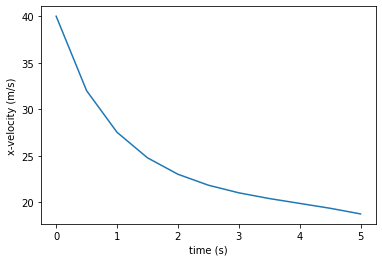

In [10]:
# Use Euler method to update variables
counter = 0
while (counter < 10):
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])  

    # With the new velocity calculate the drag force
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Print the values to check
print("t=", t)
print("vx=", vx)

# Let's plot the velocity against time
plt.plot(t,vx)
plt.ylabel("x-velocity (m/s)")
plt.xlabel("time (s)")

Range of projectile is 124.9 m


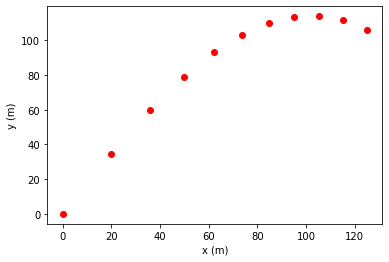

In [12]:
# Initialise the lists for x and y
x = [0]
y = [0]

# Use Euler method to update variables
counter = 0
while (counter < 10):
    # Update the positions x and y
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    
    # Increment the counter by 1
    counter = counter +1


# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
print("Range of projectile is {:3.1f} m".format(x[counter]))

80 60.0
Range of projectile is 174.4 m


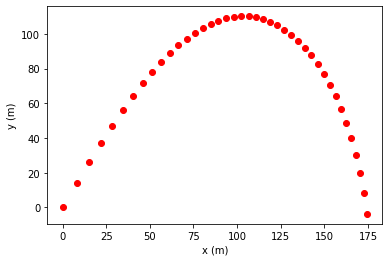

In [17]:
import numpy as np
import matplotlib.pyplot as plt#matplotlib inline

# Model parameters
M = 1.0          # Mass of projectile in kg
g = 9.8          # Acceleration due to gravity (m/s^2)
V = 80           # Initial velocity in m/s
ang = 60.0       # Angle of initial velocity in degrees
Cd = 0.005       # Drag coefficient
dt = 0.5         # time step in s

# You can check the variables by printing them out
print(V, ang)

# Set up the lists to store variables
# Initialize the velocity and position at t=0
t = [0]                         # list to keep track of time
vx = [V*np.cos(ang/180*np.pi)]  # list for velocity x and y components
vy = [V*np.sin(ang/180*np.pi)]
x = [0]                         # list for x and y position
y = [0]

# Drag force
drag=Cd*V**2                      # drag force 

# Acceleration components
ax = [-(drag*np.cos(ang/180*np.pi))/M ]          
ay = [-g-(drag*np.sin(ang/180*np.pi)/M) ]

## Leave this out for students to try
# We can choose to have better control of the time-step here
dt = 0.2

# Use Euler method to update variables
counter = 0
while (y[counter] >= 0):                   # Check that the last value of y is >= 0
    t.append(t[counter]+dt)                # increment by dt and add to the list of time 
    
    
    
    # Update velocity
    vx.append(vx[counter]+dt*ax[counter])  # Update the velocity
    vy.append(vy[counter]+dt*ay[counter])

    # Update position
    x.append(x[counter]+dt*vx[counter])    
    y.append(y[counter]+dt*vy[counter])    

    # With the new velocity calculate the drag force and update acceleration
    vel = np.sqrt(vx[counter+1]**2 + vy[counter+1]**2)   # magnitude of velocity
    drag = Cd*vel**2                                   # drag force 
    ax.append(-(drag*np.cos(ang/180*np.pi))/M)     
    ay.append(-g-(drag*np.sin(ang/180*np.pi)/M))
    
    # Increment the counter by 1
    counter = counter +1

# Let's plot the trajectory
plt.plot(x,y,'ro')
plt.ylabel("y (m)")
plt.xlabel("x (m)")
   
# The last value of x should give the range of the projectile approximately.

print("Range of projectile is {:3.1f} m".format(x[counter]))